In [1]:
!pip install paho-mqtt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.3 MB/s eta 0:00:00


In [13]:
import random
import requests
import time

# Your Write API Key from ThingSpeak
write_api_key = "U6ASC4VGEC1DA3PF"

def generate_sensor_data():
    temperature = round(random.uniform(-50, 50), 2)
    humidity = round(random.uniform(0, 100), 2)
    co2 = round(random.uniform(300, 2000), 2)
    return temperature, humidity, co2

# Send a few sample entries (not infinite loop to avoid Colab timeout)
for i in range(5):
    temp, hum, co2 = generate_sensor_data()
    url = f"https://api.thingspeak.com/update?api_key={write_api_key}&field1={temp}&field2={hum}&field3={co2}"

    response = requests.get(url)

    if response.status_code == 200:
        print(f"[Sent] Temp: {temp} °C | Humidity: {hum}% | CO2: {co2} ppm | Entry ID: {response.text}")
    else:
        print("Failed to send data.")

    time.sleep(15)


[Sent] Temp: -42.13 °C | Humidity: 53.81% | CO2: 831.4 ppm | Entry ID: 32
[Sent] Temp: 28.29 °C | Humidity: 68.19% | CO2: 691.21 ppm | Entry ID: 33
[Sent] Temp: 38.88 °C | Humidity: 33.46% | CO2: 697.16 ppm | Entry ID: 34
[Sent] Temp: -7.54 °C | Humidity: 86.81% | CO2: 609.47 ppm | Entry ID: 35
[Sent] Temp: -9.18 °C | Humidity: 85.61% | CO2: 660.96 ppm | Entry ID: 36


In [17]:
import requests

url = "https://api.thingspeak.com/channels/2892082/feeds.json?api_key=OU3AB0V98CIY5NGX&results=2"
response = requests.get(url)
print("Status Code:", response.status_code)
print("Response Text:", response.text)


Status Code: 200
Response Text: {"channel":{"id":2892082,"name":"Virtual Station","latitude":"0.0","longitude":"0.0","field1":"Temperature","field2":"Humidity","field3":"CO2","created_at":"2025-03-25T18:10:25Z","updated_at":"2025-03-25T18:10:25Z","last_entry_id":37},"feeds":[{"created_at":"2025-03-25T18:38:27Z","entry_id":36,"field1":"-9.18","field2":"85.61","field3":"660.96"},{"created_at":"2025-03-25T18:39:35Z","entry_id":37,"field1":"16.34","field2":"35.55","field3":"1281.61"}]}


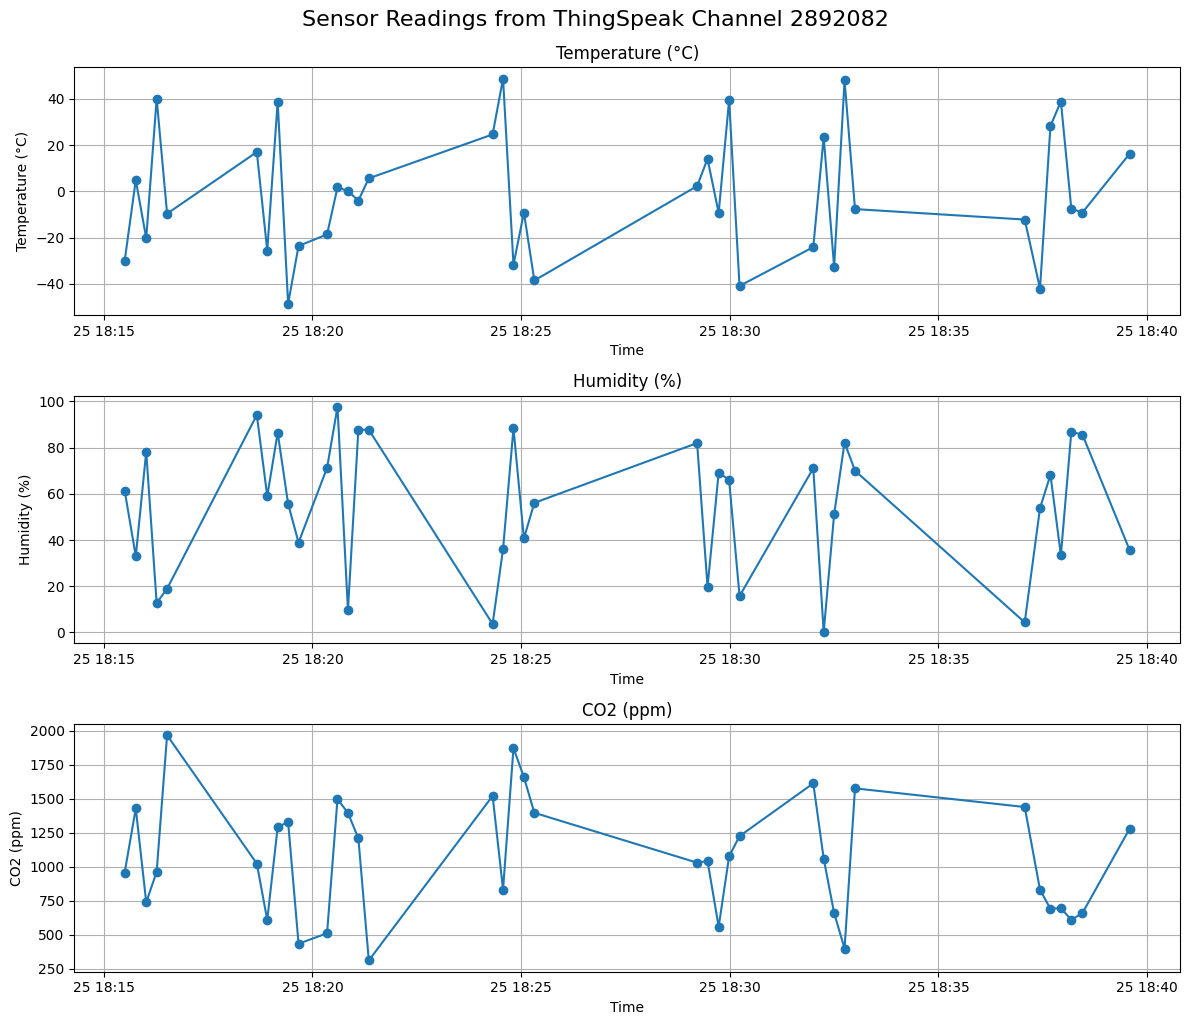

In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

channel_id = "2892082"
read_api_key = "OU3AB0V98CIY5NGX"
base_url = f"https://api.thingspeak.com/channels/{channel_id}"

sensor_fields = {
    "Temperature (°C)": 1,
    "Humidity (%)": 2,
    "CO2 (ppm)": 3
}

plt.figure(figsize=(12, 10))

for i, (label, field_num) in enumerate(sensor_fields.items(), start=1):
    url = f"{base_url}/fields/{field_num}.json?api_key={read_api_key}&hours=5&results=100"
    response = requests.get(url)

    try:
        data = response.json()

        if "feeds" not in data:
            print(f"❌ No data found for {label}.")
            continue

        feeds = data["feeds"]
        if not feeds:
            print(f"⚠️ No recent data to plot for {label}.")
            continue

        df = pd.DataFrame(feeds)
        df['created_at'] = pd.to_datetime(df['created_at'])
        df[f'field{field_num}'] = pd.to_numeric(df[f'field{field_num}'], errors='coerce')

        plt.subplot(3, 1, i)
        plt.plot(df['created_at'], df[f'field{field_num}'], marker='o')
        plt.title(label)
        plt.xlabel('Time')
        plt.ylabel(label)
        plt.grid(True)
        plt.tight_layout()

    except Exception as e:
        print(f"❌ Error processing {label}: {e}")

plt.suptitle('Sensor Readings from ThingSpeak Channel 2892082', fontsize=16, y=1.02)
plt.show()
